<center>
<b><h1>TÉCNICAS DE INTELIGENCIA ARTIFICIAL</h1></b><br><br>
<h2>Taller de filtros</h2><br><br>
<h3>Docente:</h3>
<h3>Daniel Vargas Medina</h3><br><br>
<h3>Presentan:</h3>
<h3>Brian Camilo Saiz Cavanzo</h3>
<h3>Camilo Esteban Zambrano Pereira</h3> <br><br>
<h3>Fecha</h3>
<h3>1 de abril de 2022</h3><br><br>
</center>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
%matplotlib inline

In [2]:
cancer = cv2.imread("fig/Cancer (4).tif", 0)
not_cancer = cv2.imread("fig/Not Cancer  (1).jpg", 0)

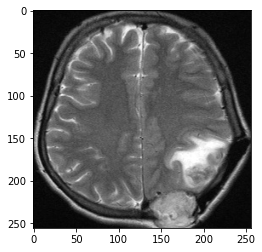

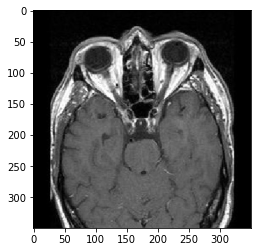

In [3]:
plt.imshow(cancer, cmap="gray")
plt.figure()
plt.imshow(not_cancer, cmap="gray")

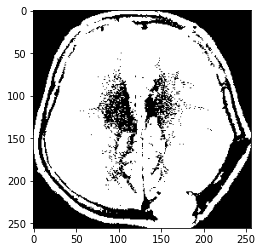

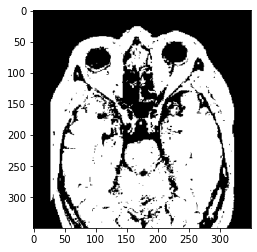

In [4]:
# Umbralización
cancer_umbral = cv2.adaptiveThreshold(cancer, 180, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
cancer_umbral[cancer_umbral==180] = 1
plt.imshow(cancer_umbral, cmap="gray")
not_cancer_umbral = cv2.adaptiveThreshold(not_cancer, 180, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
not_cancer_umbral[not_cancer_umbral==180] = 1
plt.figure()
plt.imshow(not_cancer_umbral, cmap="gray")


# Esqueleto

In [5]:
def skeleton(img):
    return skeletonize(img)

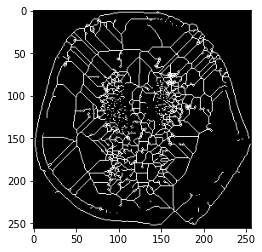

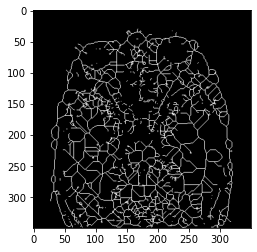

In [6]:
skel_cancer = skeleton(cancer_umbral)
skel_not_cancer = skeleton(not_cancer_umbral)
plt.imshow(skel_cancer, cmap="gray")
plt.figure()
plt.imshow(skel_not_cancer, cmap="gray")

# Adelgazamiento

In [7]:
from skimage.morphology import thin
def adelgazamiento(img):
    return thin(img)

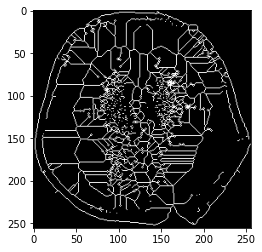

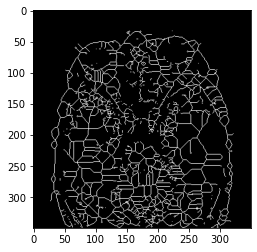

In [8]:
thin_cancer = adelgazamiento(cancer_umbral)
thin_not_cancer = adelgazamiento(not_cancer_umbral)
plt.imshow(thin_cancer, cmap="gray")
plt.figure()
plt.imshow(thin_not_cancer, cmap="gray")

# Dilatación

In [9]:
def dilatacion(img):
    methods = [cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS]
    kernels = [cv2.getStructuringElement(method, (5, 5)) for method in methods]
    return [cv2.dilate(img, kernel) for kernel in kernels]

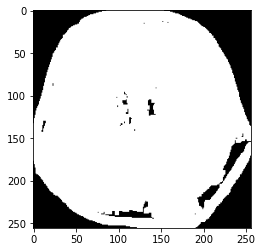

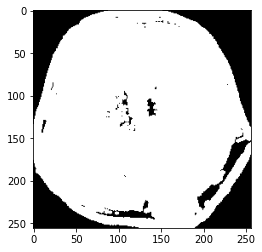

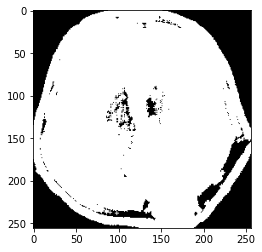

<Figure size 432x288 with 0 Axes>

In [10]:
cancer_dil = dilatacion(cancer_umbral)
for img in cancer_dil:
    plt.imshow(img, cmap="gray")
    plt.figure()

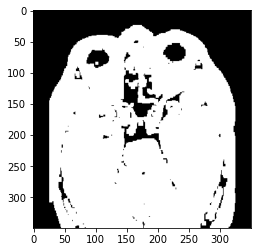

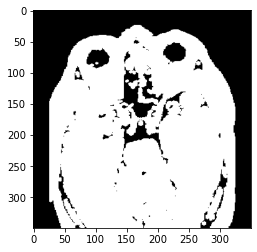

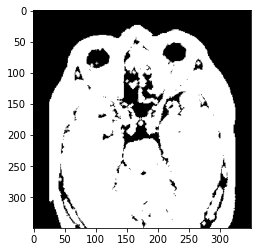

<Figure size 432x288 with 0 Axes>

In [11]:
not_cancer_dil = dilatacion(not_cancer_umbral)
for img in not_cancer_dil:
    plt.imshow(img, cmap="gray")
    plt.figure()

# Erosión

In [12]:
def erosion(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    img = cv2.erode(img, kernel) 
    return img

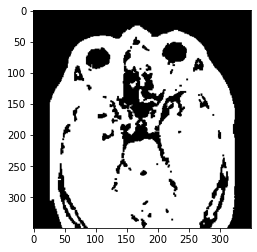

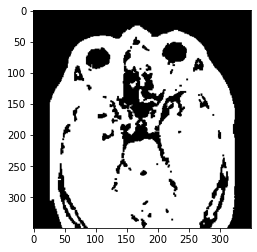

In [13]:
cancer_erode = erosion(cancer_umbral)
not_cancer_erode = erosion(not_cancer_umbral)
plt.imshow(cancer_erode, cmap="gray")
plt.figure()
plt.imshow(not_cancer_erode, cmap="gray")

# Otras morfologías
* Opening
* Closing
* Gradiente
* TopHat
* BlackHat

In [18]:
def otras_morf(img, kernel_size=5):
    methods = [cv2.MORPH_OPEN, 
               cv2.MORPH_CLOSE, 
               cv2.MORPH_GRADIENT, 
               cv2.MORPH_TOPHAT, 
               cv2.MORPH_BLACKHAT]
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    images = [cv2.morphologyEx(img, method, kernel) for method in methods]
    return images

In [19]:
cancer_morf = otras_morf(cancer_umbral)
not_cancer_morf = otras_morf(not_cancer_umbral)

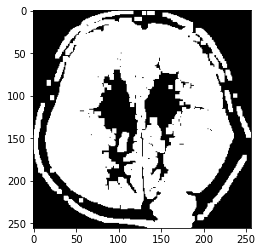

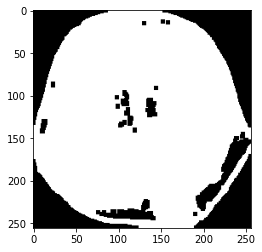

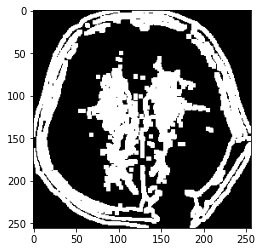

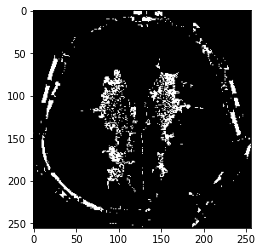

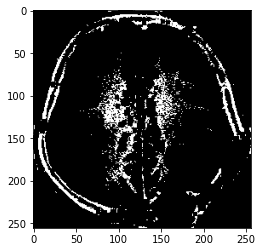

<Figure size 432x288 with 0 Axes>

In [20]:
for img in cancer_morf:
    plt.imshow(img, cmap="gray")
    plt.figure()

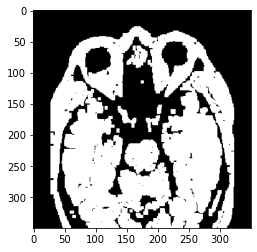

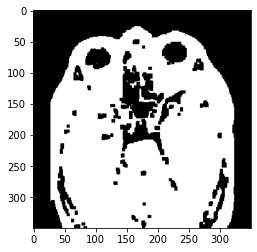

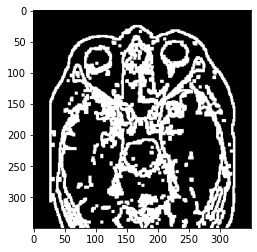

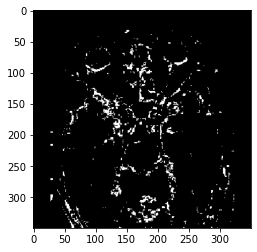

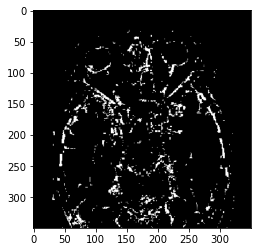

<Figure size 432x288 with 0 Axes>

In [21]:
for img in not_cancer_morf:
    plt.imshow(img, cmap="gray")
    plt.figure()